In [196]:
import pandas as pd
import seaborn as sns
import numpy as np
import csv
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

data = pd.read_csv('../csv/raisin.csv')

raisin = data[['class', 'area', 'majoraxislength', 'minoraxislength', 'eccentricity', 'convexarea', 'extent', 'perimeter']]

# Preview of Data
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).

In [197]:
raisin.head()

,class,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter
0,Kecimen,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,Kecimen,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,Kecimen,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,Kecimen,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,Kecimen,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [198]:
raisin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            900 non-null    object 
 1   area             900 non-null    int64  
 2   majoraxislength  900 non-null    float64
 3   minoraxislength  900 non-null    float64
 4   eccentricity     900 non-null    float64
 5   convexarea       900 non-null    int64  
 6   extent           900 non-null    float64
 7   perimeter        900 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [199]:
raisin.describe()

,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [200]:
# percentage of each class
raisin['class'].value_counts(normalize=True)

class_percentage = {}
for i in raisin['class'].value_counts().index:
    class_percentage[i] = raisin['class'].value_counts(normalize=True)[i], (150 * raisin['class'].value_counts(normalize=True)[i]).round(0)
class_percentage


{'Kecimen': (0.5, 75.0), 'Besni': (0.5, 75.0)}

# Data Visualization
- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).


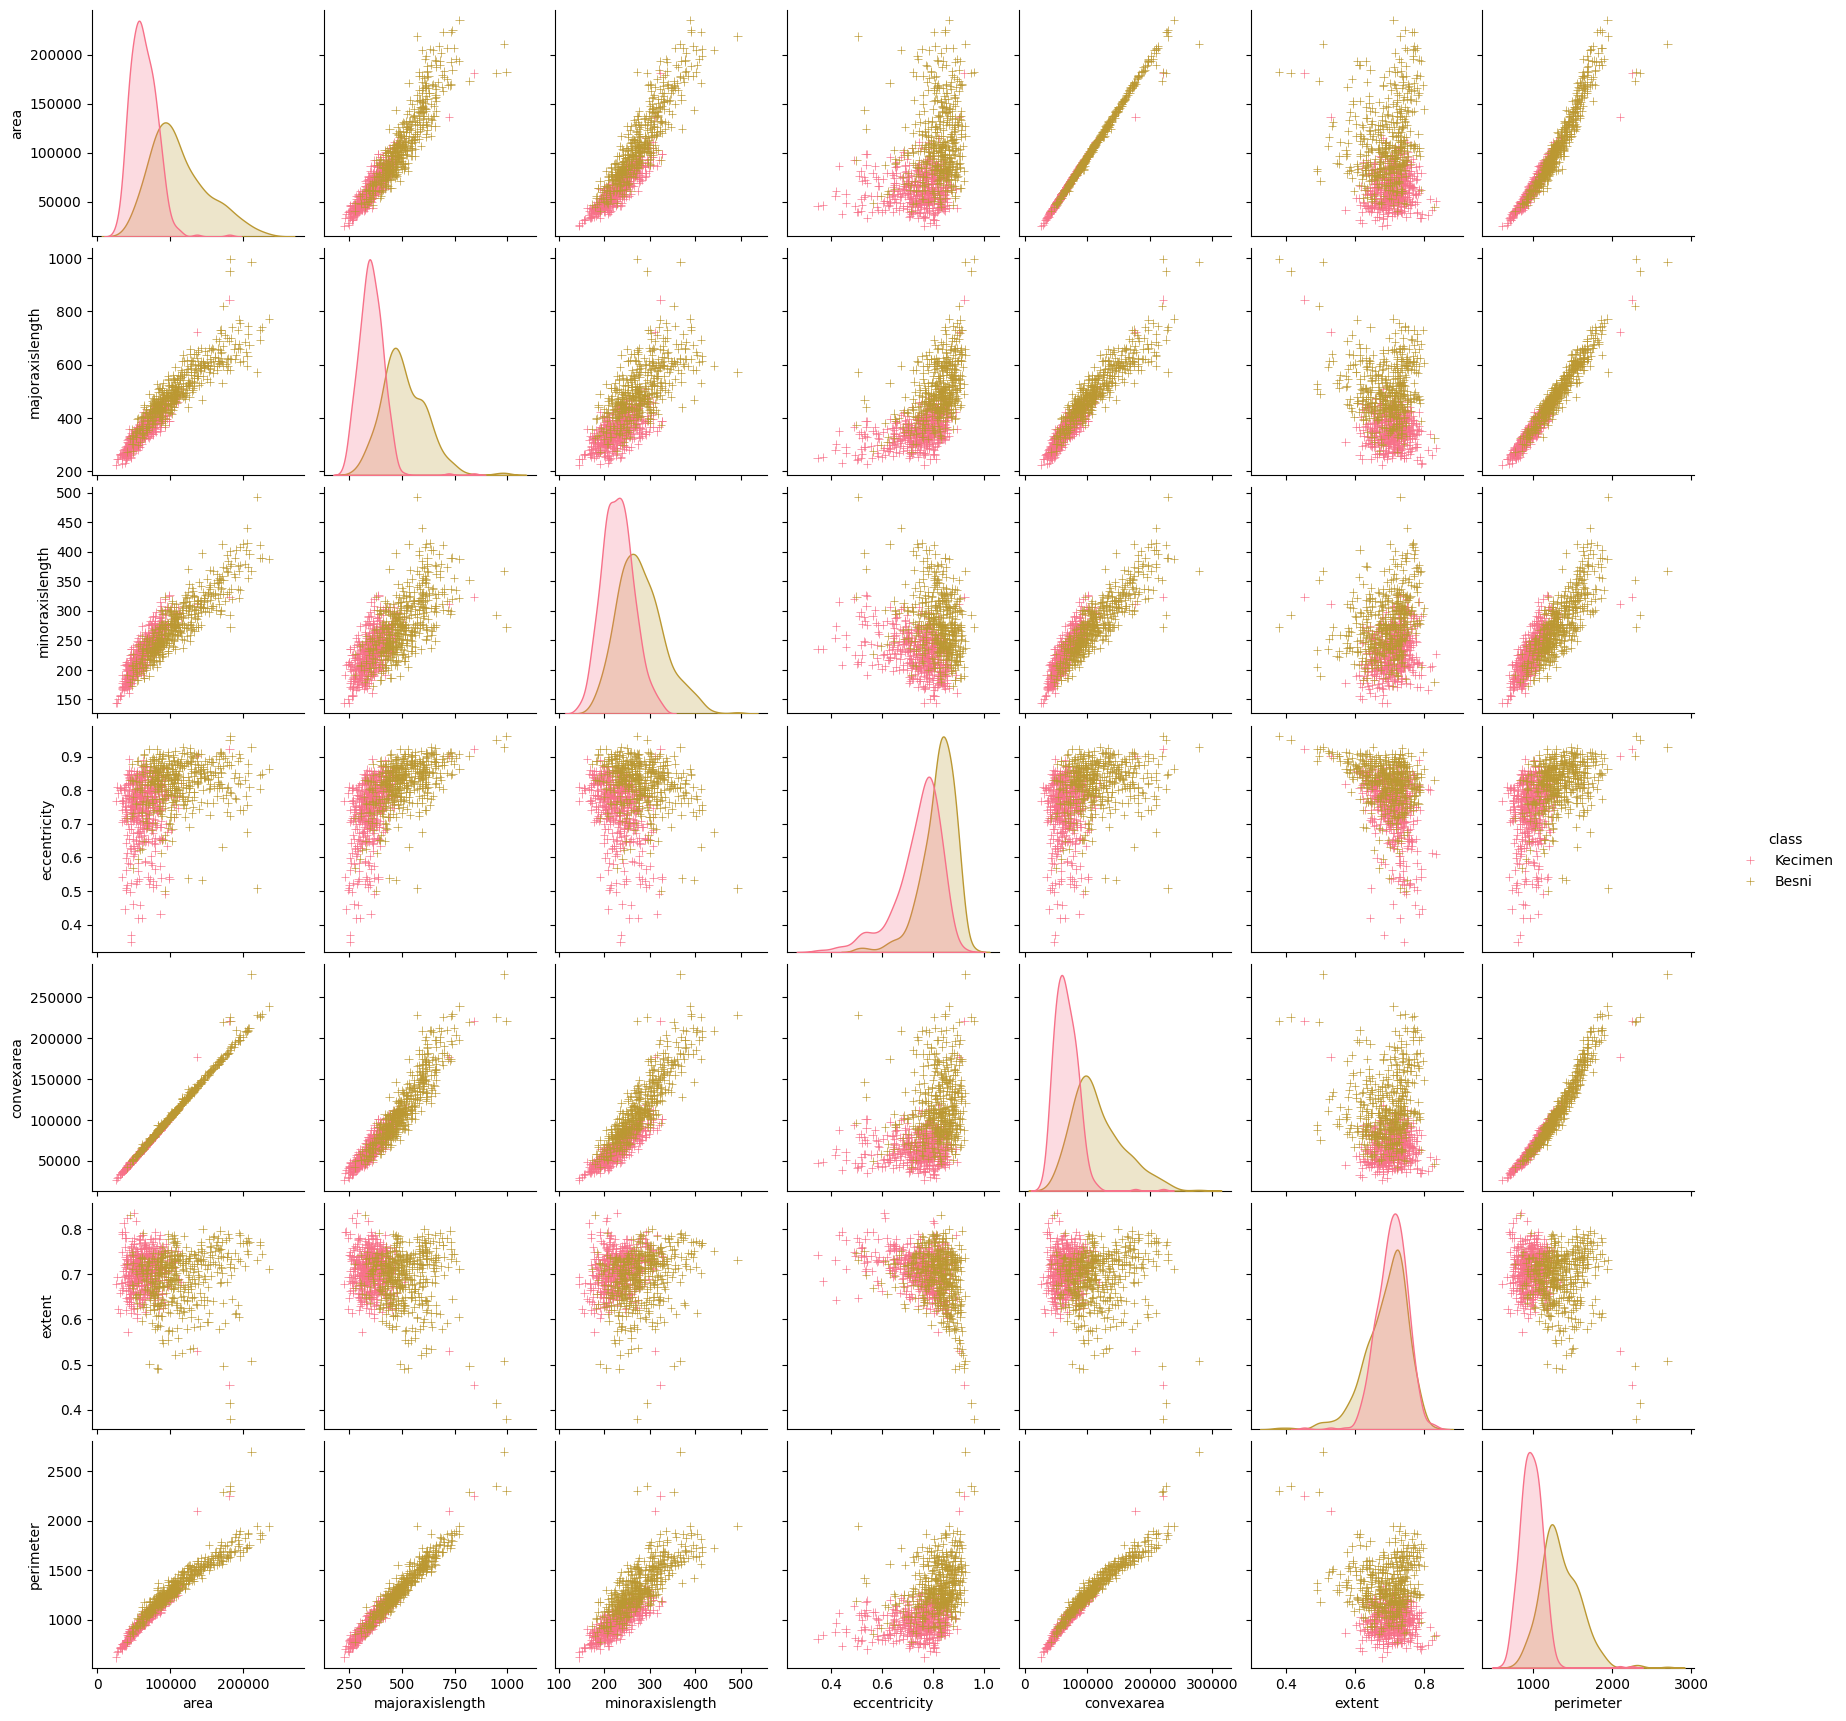

In [201]:
g = sns.pairplot(data, hue='class', markers='+')
plt.show()

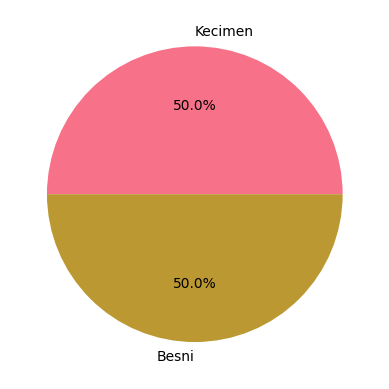

In [202]:
fig, ax = plt.subplots()
ax.pie(raisin['class'].value_counts(normalize=True), labels=raisin['class'].value_counts().index, autopct='%1.1f%%')
plt.show()

# Spliting the Data

In [203]:
X = raisin.drop('class', axis=1)
y = raisin['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [204]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8666666666666667


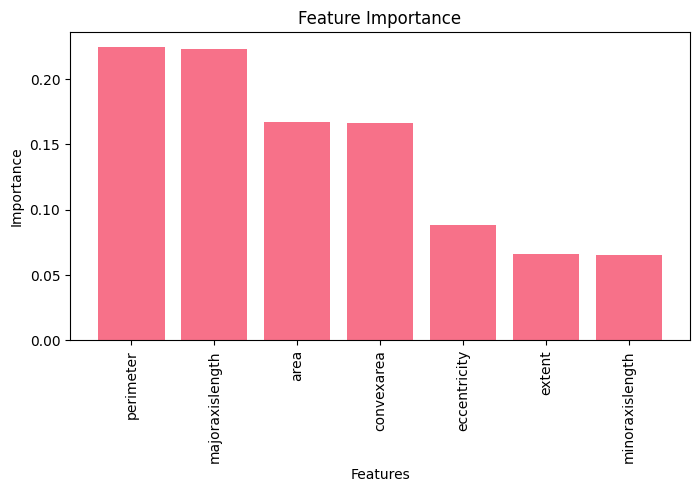

In [205]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize=(8, 4))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


## Data reduction

### Reduction of the number of elements

In [206]:
final_raisin_count = dict.fromkeys(raisin['class'].unique(), 0)

with open('../csv/final_raisin.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(raisin.columns)
    for index, row in raisin.iterrows():
        if final_raisin_count[row['class']] < class_percentage[row['class']][1]:
            writer.writerow(row)
            final_raisin_count[row['class']] += 1

In [207]:
final_data = pd.read_csv('../csv/final_raisin.csv')

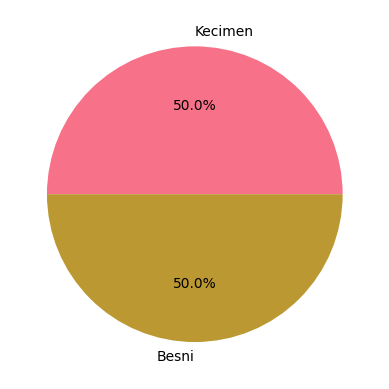

In [208]:
fig, ax = plt.subplots()
ax.pie(final_data['class'].value_counts(normalize=True), labels=final_data['class'].value_counts().index, autopct='%1.1f%%')
plt.show()

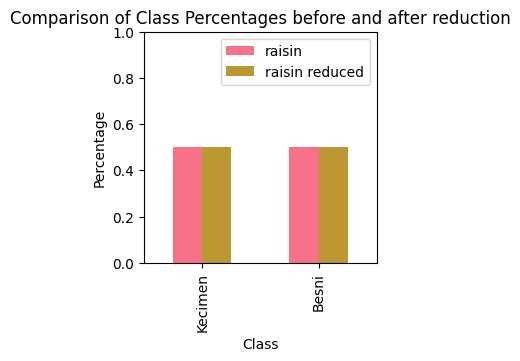

In [209]:
data_percentage = raisin['class'].value_counts(normalize=True)
final_data_percentage = final_data['class'].value_counts(normalize=True)

percentage_comparison = pd.concat([data_percentage, final_data_percentage], axis=1)
percentage_comparison.columns = ['raisin', 'raisin reduced']


ax = percentage_comparison.plot(kind='bar', figsize=(3, 3))
ax.set_ylim(0, 1)
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Comparison of Class Percentages before and after reduction')
plt.show()

In [210]:
average_percentage_change = percentage_comparison['raisin'].pct_change().mean()
average_percentage_change


0.0

### Reduction of the number of features

In [211]:
reduced_data = final_data[['class', 'majoraxislength', 'perimeter', 'convexarea', 'area', 'eccentricity']]

reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            150 non-null    object 
 1   majoraxislength  150 non-null    float64
 2   perimeter        150 non-null    float64
 3   convexarea       150 non-null    int64  
 4   area             150 non-null    int64  
 5   eccentricity     150 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 7.2+ KB


In [212]:
reduced_data['class'] = reduced_data['class'].map({'Besni': 1, 'Kecimen': 0})


/var/folders/qt/0w2950ws2bxb8smtx1s91h5r0000gn/T/ipykernel_22965/1583206199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data['class'] = reduced_data['class'].map({'Besni': 1, 'Kecimen': 0})


# Spliting the Data

In [213]:
X = reduced_data.drop('class', axis=1)
y = reduced_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

## Train and Test Split

In [214]:
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=5)

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("AUC Score:", auc_score)
print("Cross-Validation Scores:", cross_val_scores)


Accuracy: 0.7368421052631579
F1 Score: 0.7058823529411765
AUC Score: 0.7333333333333333
Cross-Validation Scores: [0.8        0.93333333 0.93333333 0.9        0.9       ]
